# Exploration of the Online Retail dataset

The [Online Retail](https://archive.ics.uci.edu/ml/datasets/Online+Retail) dataset from the UCI ML repository  contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based online retail.

Its features are:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides. 

Some rows contain charaters that may cause problems with pandas. In this notebook we explore a subset of 10000 rows of the original dataset.


In [46]:
# Import required librairies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
# Load the dataset into a panda DataFrame 
# For more info on read_csv: type ?pd.read_csv 

df = pd.read_csv('../data/small_online_retail.csv')

# The Dataframe has 9999 rows and 8 columns / features as expected
print("The Dataframe shape is: %s  "% str(df.shape))



The Dataframe shape is: (9999, 8)  


In [48]:
# The features are

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [50]:
# Some global description of the columns
df.describe()
# Notice how the scales are very different among the features

,Quantity,UnitPrice,CustomerID
count,9999.000000,9999.000000,9999.000000
mean,20.209021,4.227425,12418.452945
std,1050.539430,17.110132,38.507666
min,-74215.000000,0.000000,12346.000000
25%,6.000000,1.250000,12384.000000
50%,12.000000,1.950000,12422.000000
75%,20.000000,4.150000,12451.000000
max,74215.000000,700.000000,12474.000000


In [51]:
# Now let's see how many transactions we have per country
df.Country.value_counts()

Belgium           1958
Germany           1642
Switzerland       1444
Australia         1243
Norway            1033
Cyprus             610
Finland            403
Denmark            356
Spain              323
Austria            285
France             252
Iceland            182
Portugal            95
Italy               73
RSA                 58
Unspecified         23
Bahrain             17
United Kingdom       2
Name: Country, dtype: int64

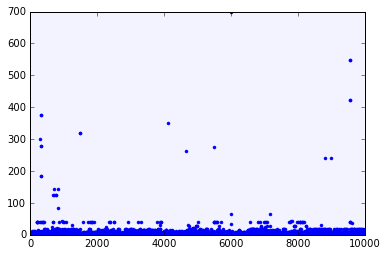

In [53]:
# Plot the Prices
plt.plot(df.UnitPrice,'.')

# Notice the outliers, prices that are well above the most frequent values 

In [54]:
# To find these outliers create a condition 
cond = (df.UnitPrice > 80)

# cond is a pd.Series with 9999 rows containing True of False 
cond.head()


0    False
1    False
2    False
3    False
4    False
Name: UnitPrice, dtype: bool

In [55]:
# Let's see the rows which have a price greater than 100
df[cond].shape

(26, 8)

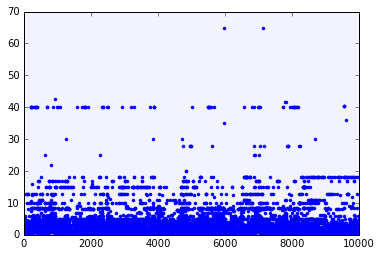

In [45]:
# plot the prices below 100, note the ~ sign to negate the condition

plt.plot(df[~cond].UnitPrice,'.')